In [27]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as npr

In [28]:
def schwartz_1factor(S0,mean,volatility,T=1,time=252,N=100,kappa=1):
    X = np.zeros((N,time+1))
    S = np.zeros((N,time+1))
    dt = T/time
    mu = mean
    sigma = volatility
    X[:,0] = np.log(S0)
    #S[:,0] = S0
    #alpha = mu
    alpha = mu - ((sigma ** 2) / (2*kappa))
    for i in range(1,time + 1):
        phi = npr.normal(0,1,N)
        X[:,i] = X[:,i-1] + kappa * (alpha - X[:,i-1]) * dt + sigma * phi * np.sqrt(dt)
        #S[:,i] = S[:,i-1] * ( 1 + kappa * (mu - np.log(S[:,i-1])) * dt + sigma * phi * np.sqrt(dt))
    return X
    #return S

In [29]:
#Parameters
S0 = 100  # Initial price
X0 = np.log(S0) # Initial log price
kappa = 0.001  # Speed of mean reversion
mean = np.log(90)  # Long-term mean
volatility = 0  # Volatility
T = 1  # Total time (1 year)
time = 50
dt = T/time
N = 10000  # Number of paths to simulate

df = schwartz_1factor(S0,mean,volatility,T,time,N,kappa)

In [30]:
# Analytical expected price and variance of S or X
def expected_log_price(X0, mean, kappa, t):
    return X0 * np.exp(-kappa * t) + mean * (1 - np.exp(-kappa * t))

def variance_log_price(volatility, kappa, t):
    return (volatility ** 2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))
=
times = np.linspace(0, T, time + 1)

E_Xt = np.array([expected_log_price(np.log(S0), mean, kappa, t) for t in times])
Var_Xt = np.array([variance_log_price(volatility, kappa, t) for t in times])

#E_St = np.exp(E_Xt + 0.5 * Var_Xt)
#Var_St = (np.exp(Var_Xt) - 1) * np.exp(2 * E_Xt + Var_Xt)


# Functions for expected value and variance
def expected_value_S(t, S0, mean, kappa, volatility):
    X0 = np.log(S0)
    expected_X_T = X0 * np.exp(-kappa * t) + mean * (1 - np.exp(-kappa * t))
    variance_X_T = (volatility**2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))
    return np.exp(expected_X_T + 0.5 * variance_X_T)

def variance_S(t, S0, mean, kappa, volatility):
    X0 = np.log(S0)
    expected_X_T = X0 * np.exp(-kappa * t) + mean * (1 - np.exp(-kappa * t))
    variance_X_T = (volatility**2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))
    return (np.exp(variance_X_T) * (np.exp(2 * expected_X_T + variance_X_T) - np.exp(2 * expected_X_T)))

E_St = np.array([expected_value_S(t, S0, mean, kappa, volatility) for t in times])

Var_St = np.array( [variance_S(t, S0, mean, kappa, volatility) for t in times])


In [31]:
df_meanX = df.mean(axis=0)
df_varX = df.var(axis=0)

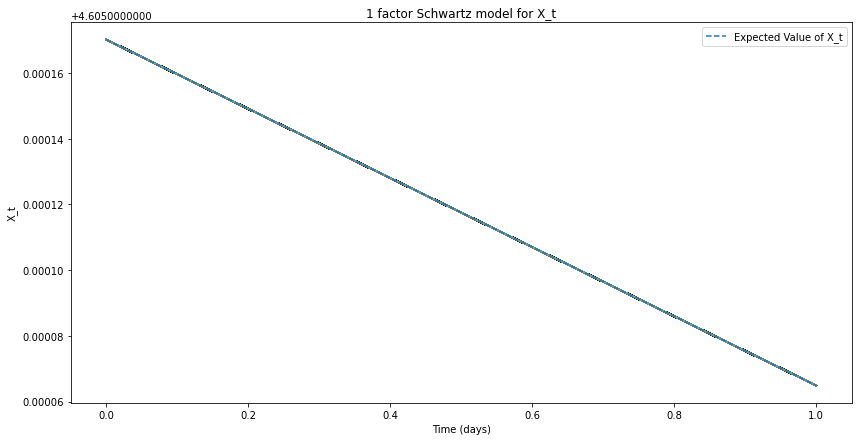

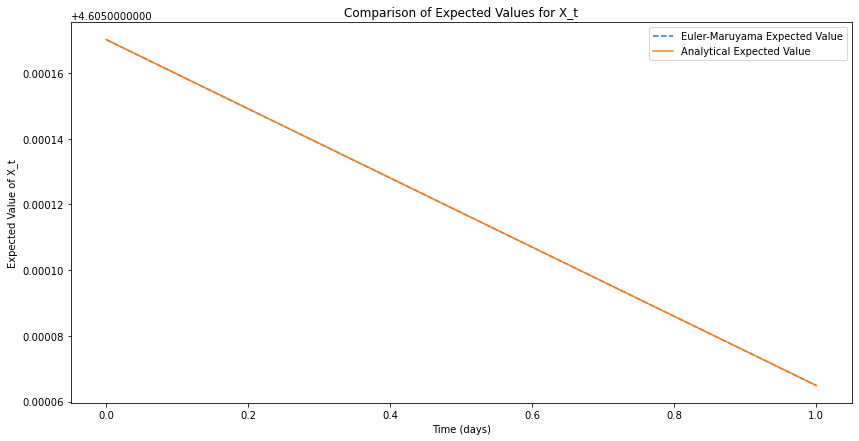

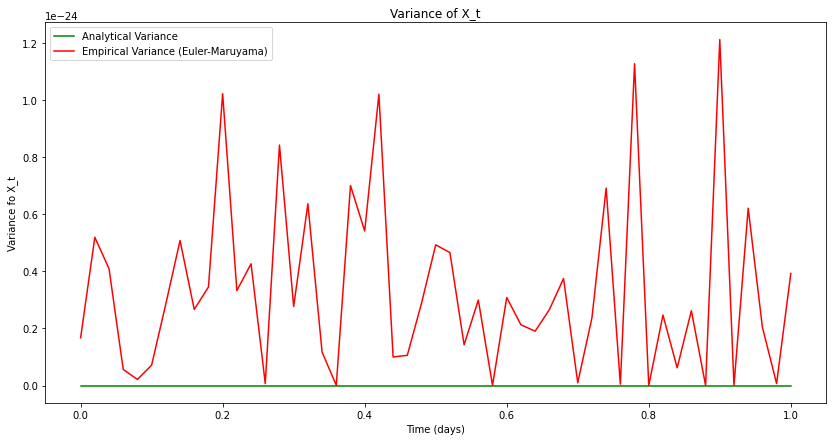

In [32]:
#X_t
# Plot the results
plt.figure(figsize=(14, 7))
for i in range(N):
    plt.plot(times, df[i],alpha = 0.5)
plt.plot(times, E_Xt, label='Expected Value of X_t', linestyle='--')
plt.title('1 factor Schwartz model for X_t')
plt.xlabel('Time (days)')
plt.ylabel('X_t')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, df_meanX, label='Euler-Maruyama Expected Value', linestyle='--')
plt.plot(times, E_Xt, label='Analytical Expected Value', linestyle='-')
plt.title('Comparison of Expected Values for X_t')
plt.xlabel('Time (days)')
plt.ylabel('Expected Value of X_t')
plt.legend()
plt.show()


# Plotting variance paths with analytical and empirical variances
plt.figure(figsize=(14, 7))

plt.plot(times, Var_Xt, label='Analytical Variance', color='green')
plt.plot(times, df_varX, label='Empirical Variance (Euler-Maruyama)', color='red')
plt.title('Variance of X_t')
plt.xlabel('Time (days)')
plt.ylabel('Variance fo X_t')
plt.legend()
plt.show()

In [33]:
dfS = np.exp(df)
df_meanS = dfS.mean(axis=0)
df_varS = dfS.var(axis=0)

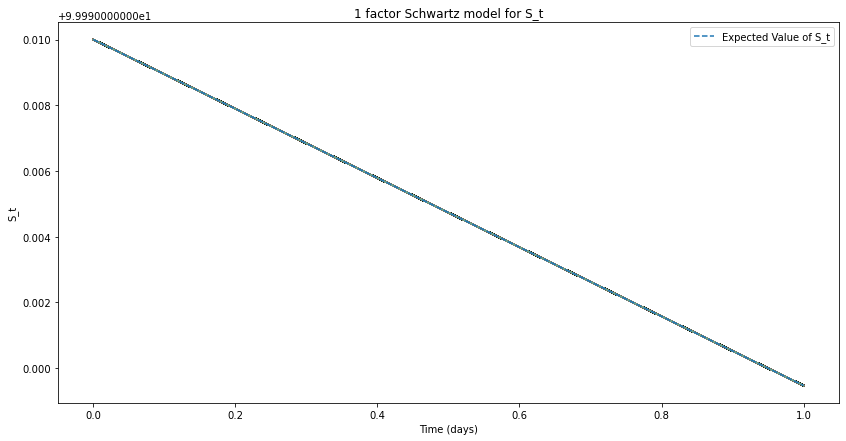

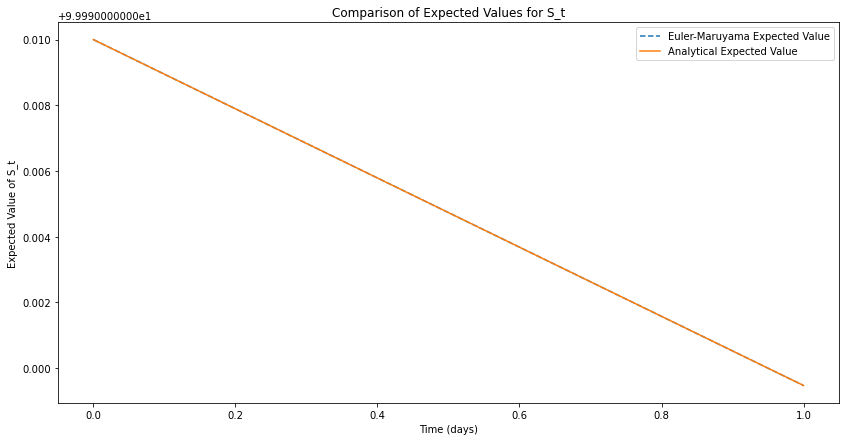

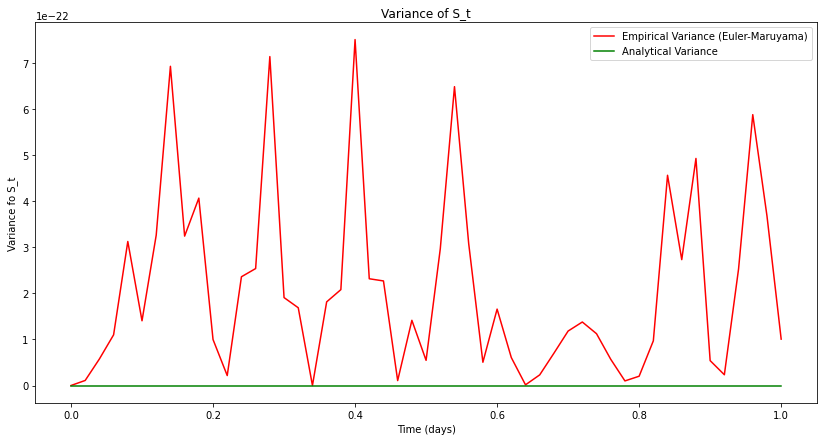

In [34]:
#S_t
# Plot the results
plt.figure(figsize=(14, 7))
for i in range(N):
    plt.plot(times, dfS[i],alpha = 0.5)
plt.plot(times, E_St, label='Expected Value of S_t', linestyle='--')
plt.title('1 factor Schwartz model for S_t')
plt.xlabel('Time (days)')
plt.ylabel('S_t')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, df_meanS, label='Euler-Maruyama Expected Value', linestyle='--')
plt.plot(times, E_St, label='Analytical Expected Value', linestyle='-')
plt.title('Comparison of Expected Values for S_t')
plt.xlabel('Time (days)')
plt.ylabel('Expected Value of S_t')
plt.legend()
plt.show()


# Plotting variance paths with analytical and empirical variances
plt.figure(figsize=(14, 7))

plt.plot(times, df_varS, label='Empirical Variance (Euler-Maruyama)', color='red')
plt.plot(times, Var_St, label='Analytical Variance', color='green')
plt.title('Variance of S_t')
plt.xlabel('Time (days)')
plt.ylabel('Variance fo S_t')
plt.legend()
plt.show()

In [35]:
#X at T = 1
print('Mean of X at T = 1: ', df_meanX[-1])
print('Analytical mean of X at T = 1: ', expected_log_price(X0,mean,kappa,1))
print( 'Variance of X at T = 1: ', df_varX[-1])
print('Analytical variance of X at T = 1: ' ,variance_log_price(volatility,kappa,1))



Mean of X at T = 1:  4.605064877083196
Analytical mean of X at T = 1:  4.605064878135136
Variance of X at T = 1:  3.920835914174734e-25
Analytical variance of X at T = 1:  0.0


In [36]:
#S at T = 1

print('Mean of S at T = 1: ', df_meanS[-1])
print('Analytical mean of S at T = 1: ', expected_value_S(1,S0,mean,kappa,volatility))
print('Variance of S at T = 1: ', df_varS[-1])
print('Analytical variance of S at T = 1: ' ,variance_S(1,S0,mean,kappa,volatility))

Mean of S at T = 1:  99.98946966393669
Analytical mean of S at T = 1:  99.98946976917217
Variance of S at T = 1:  1.006583485836135e-22
Analytical variance of S at T = 1:  0.0


def mu(t,mu1,mu2,mu3,mu4,mu5,mu6):
    if t <= 0.125:
        return mu1
    elif t <= 0.25:
        return mu2
    elif t <= 0.5:
        return mu3
    elif t <= 0.75:
        return mu4
    elif t <= 0.8:
        return mu5
    else:
        return mu6

mu1,mu2,mu3,mu4,mu5,mu6 = np.log([95, 110, 98, 97, 96, 99])

df = [schwartz_1factor(S0,mu(dt,mu1,mu2,mu3,mu4,mu5,mu6),volatility,T,time,10,kappa)]
df
plt.plot(df)

time = np.linspace(0,1,100)
h = [mu(t,mu1,mu2,mu3,mu4,mu5,mu6) for t in time]
plt.plot(h)

In [37]:
def mu(t, mu_values, time_breakpoints):
    # Iterate through the time breakpoints
    for i in range(len(time_breakpoints)):
        if t <= time_breakpoints[i]:
            return mu_values[i]
    return mu_values[-1]  # Return the last value if t is greater than all breakpoints


In [38]:
def schwartz_1factor_modified(S0,mean,volatility,T=1,time=252,N=100,kappa=1,time_breakpoints=None):
    X = np.zeros((N,time+1))
    #S = np.zeros((N,time+1))
    dt = T/time
    sigma = volatility
    X[:,0] = np.log(S0)
    #S[:,0] = S0

    for i in range(1,time + 1):
        current_time = i * dt
        current_mu = mu(current_time, mean, time_breakpoints)
        alpha = current_mu - ((sigma ** 2) / (2 * kappa))
        phi = npr.normal(0,1,N)
        X[:,i] = X[:,i-1] + kappa * (alpha - X[:,i-1]) * dt + sigma * phi * np.sqrt(dt)
        #S[:,i] = S[:,i-1] * ( 1 + kappa * (mu - np.log(S[:,i-1])) * dt + sigma * phi * np.sqrt(dt))
    return X
    #return S

In [39]:
mu_values = np.log([95, 110, 98, 97, 96, 99])
time_breakpoints = [0.125,0.25,0.5,0.75,0.8]
df_modified = schwartz_1factor_modified(S0, mu_values, volatility, T, time, N, kappa, time_breakpoints)

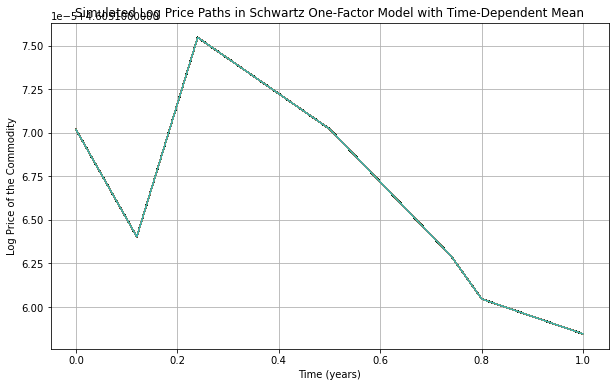

In [40]:
# You can plot or analyze X as needed
plt.figure(figsize=(10, 6))
for i in range(N):  # Plot the first 10 paths for clarity
    plt.plot(np.linspace(0, T, time + 1), df_modified[i], lw=1)

plt.xlabel('Time (years)')
plt.ylabel('Log Price of the Commodity')
plt.title('Simulated Log Price Paths in Schwartz One-Factor Model with Time-Dependent Mean')
plt.grid(True)
plt.show()

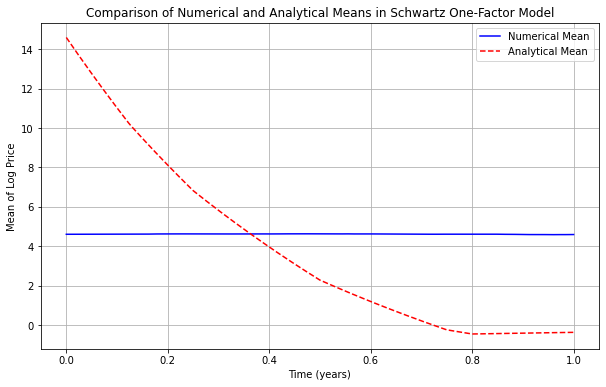

In [41]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

# Time-dependent mean function
def mu(t, mu_values, time_breakpoints):
    for i in range(len(time_breakpoints)):
        if t <= time_breakpoints[i]:
            return mu_values[i]
    return mu_values[-1]  # Return the last value if t is greater than all breakpoints

# Schwartz one-factor model simulation
def schwartz_1factor(S0, mu_values, volatility, T=1, time=252, N=100, kappa=1, time_breakpoints=None):
    X = np.zeros((N, time + 1))
    dt = T / time
    sigma = volatility
    X[:, 0] = np.log(S0)

    for i in range(1, time + 1):
        current_time = i * dt
        current_mu = mu(current_time, mu_values, time_breakpoints)
        alpha = current_mu - ((sigma ** 2) / (2 * kappa))
        phi = npr.normal(0, 1, N)
        X[:, i] = X[:, i - 1] + kappa * (alpha - X[:, i - 1]) * dt + sigma * phi * np.sqrt(dt)

    return X

# Analytical mean function
def analytical_mean_X_T(X0, kappa, sigma, T, mu_values, time_breakpoints):
    mean_X_T = X0 * np.exp(-kappa * T)
    for i in range(len(time_breakpoints)):
        t_start = 0 if i == 0 else time_breakpoints[i - 1]
        t_end = min(time_breakpoints[i], T)
        mean_X_T += kappa * mu_values[i] * (np.exp(-kappa * (T - t_start)) - np.exp(-kappa * (T - t_end))) / kappa
    return mean_X_T

# Parameters
kappa = 1
sigma = 0.2
S0 = 100
mu_values = np.log([95, 110, 98, 97, 96, 99])
time_breakpoints = [0.125, 0.25, 0.5, 0.75, 0.8]
T = 1
time_steps = 252
dt = T / time_steps
N = 100
X0 = np.log(S0)

# Simulate log prices
simulated_X = schwartz_1factor(S0, mu_values, sigma, T, time_steps, N, kappa, time_breakpoints)

# Calculate the mean from the simulation
numerical_means = simulated_X.mean(axis=0)

# Calculate analytical mean at each time step
analytical_means = [analytical_mean_X_T(X0, kappa, sigma, t * dt, mu_values, time_breakpoints) for t in range(time_steps + 1)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, time_steps + 1), numerical_means, label='Numerical Mean', color='blue')
plt.plot(np.linspace(0, T, time_steps + 1), analytical_means, label='Analytical Mean', color='red', linestyle='--')
plt.xlabel('Time (years)')
plt.ylabel('Mean of Log Price')
plt.title('Comparison of Numerical and Analytical Means in Schwartz One-Factor Model')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
simulated_X

array([[4.60517019, 4.60872332, 4.5872301 , ..., 4.44160008, 4.43286874,
        4.43231672],
       [4.60517019, 4.60495569, 4.55332482, ..., 4.7020901 , 4.69157302,
        4.71662284],
       [4.60517019, 4.62680416, 4.61831624, ..., 4.68566378, 4.67873892,
        4.67452422],
       ...,
       [4.60517019, 4.61002738, 4.61699942, ..., 4.50974763, 4.51462232,
        4.52953539],
       [4.60517019, 4.5775174 , 4.57210751, ..., 4.61945661, 4.59562998,
        4.63680928],
       [4.60517019, 4.60386408, 4.61587036, ..., 4.61499271, 4.62518009,
        4.62385362]])

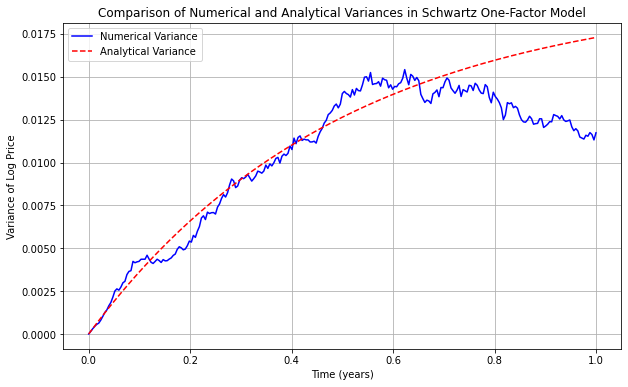

In [43]:
# Assuming the simulation data is in 'simulated_X'
# Calculate the variance from the simulation
numerical_variances = np.var(simulated_X, axis=0)

# Calculate the analytical variance at each time step
analytical_variances = [(sigma**2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t * dt)) for t in range(time_steps + 1)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, time_steps + 1), numerical_variances, label='Numerical Variance', color='blue')
plt.plot(np.linspace(0, T, time_steps + 1), analytical_variances, label='Analytical Variance', color='red', linestyle='--')
plt.xlabel('Time (years)')
plt.ylabel('Variance of Log Price')
plt.title('Comparison of Numerical and Analytical Variances in Schwartz One-Factor Model')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm
from scipy.optimize import bisect

# Black-Scholes pricing function
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to find the difference in option prices
def bs_price_diff(vol, S0, K, T, r, schwartz_price):
    return black_scholes_call(S0, K, T, r, vol) - schwartz_price

# Parameters
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2
kappa = 1
mu_values = np.log([95, 110, 98, 97, 96, 99])
time_breakpoints = [0.125, 0.25, 0.5, 0.75, 0.8]
time_steps = 252
N = 1000

# Schwartz model simulation
simulated_prices = schwartz_1factor(S0, mu_values, sigma, T, time_steps, N, kappa, time_breakpoints)

# Schwartz model option pricing
payoffs = np.maximum(simulated_prices[:, -1] - K, 0)
schwartz_option_price = np.mean(payoffs) * np.exp(-r * T)


In [45]:
simulated_prices

array([[4.60517019, 4.60326674, 4.59815449, ..., 4.62205334, 4.64055248,
        4.65398823],
       [4.60517019, 4.59719639, 4.58474833, ..., 4.51221932, 4.52241291,
        4.53577371],
       [4.60517019, 4.61480388, 4.60029448, ..., 4.70217055, 4.68877118,
        4.68566863],
       ...,
       [4.60517019, 4.6018027 , 4.59976413, ..., 4.54796849, 4.53797308,
        4.53138584],
       [4.60517019, 4.61585336, 4.63476554, ..., 4.60437952, 4.61609547,
        4.60023381],
       [4.60517019, 4.6220297 , 4.63117114, ..., 4.44653919, 4.43718622,
        4.42950245]])